In [12]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [13]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [14]:
log_returns.tail()

,PG
Date,
2021-04-12,0.004025
2021-04-13,-0.013308
2021-04-14,0.003620
2021-04-15,0.012022
2021-04-16,0.000073


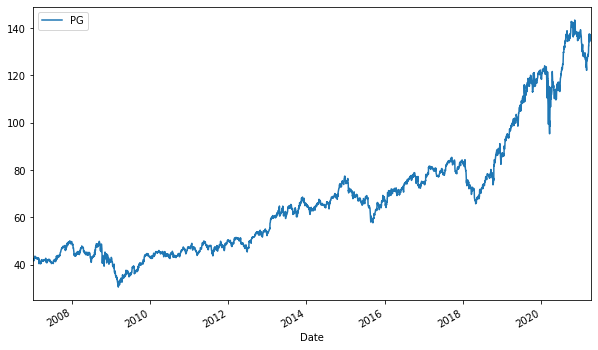

In [15]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

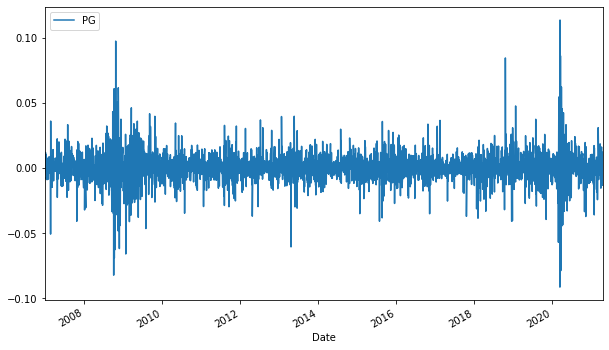

In [16]:
log_returns.plot(figsize = (10, 6))

In [17]:
u = log_returns.mean()
u

PG    0.000327
dtype: float64

In [18]:
var = log_returns.var()
var

PG    0.000141
dtype: float64

In [19]:
drift = u - (0.5 * var)
drift

PG    0.000257
dtype: float64

In [20]:
stdev = log_returns.std()
stdev

PG    0.011854
dtype: float64

******

In [21]:
type(drift)

pandas.core.series.Series

In [22]:
type(stdev)

pandas.core.series.Series

In [23]:
np.array(drift)

array([0.00025653])

In [24]:
drift.values

array([0.00025653])

In [25]:
stdev.values

array([0.01185387])

In [26]:
norm.ppf(0.95)

1.6448536269514722

In [27]:
x = np.random.rand(10, 2)
x

array([[0.41054089, 0.60647089],
       [0.89823874, 0.00687051],
       [0.52031361, 0.37325472],
       [0.9345726 , 0.19408523],
       [0.1857101 , 0.1373634 ],
       [0.20600838, 0.79575392],
       [0.36501126, 0.32618526],
       [0.04824583, 0.16356943],
       [0.87438718, 0.30920192],
       [0.94038931, 0.69264551]])

In [28]:
norm.ppf(x)

array([[-0.22615382,  0.27013262],
       [ 1.2715796 , -2.46396328],
       [ 0.0509407 , -0.32324534],
       [ 1.51073964, -0.86294   ],
       [-0.89381627, -1.09224187],
       [-0.82034974,  0.82655   ],
       [-0.34509558, -0.45047147],
       [-1.6621053 , -0.97989317],
       [ 1.14737747, -0.49811379],
       [ 1.55805007,  0.50336316]])

In [29]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.96415954, -0.21176596],
       [ 1.186382  ,  0.12632342],
       [-0.40849666,  0.27599742],
       [-0.06880372, -1.39198883],
       [-1.45902467,  0.06350953],
       [-0.96246227,  0.94876796],
       [-0.40953038,  0.6956119 ],
       [-0.54191277,  1.14513711],
       [ 0.90480485,  0.10995383],
       [ 0.64869438, -0.36399727]])

In [30]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [31]:
daily_returns

array([[0.98551517, 0.99838332, 1.0192115 , ..., 1.0113048 , 0.99892084,
        1.00732962],
       [1.00011395, 0.99738181, 0.99681834, ..., 0.99204684, 1.00336414,
        1.00462585],
       [0.99368356, 1.00778106, 0.99360283, ..., 1.02331604, 0.99810634,
        0.99275494],
       ...,
       [1.02596142, 1.0014093 , 0.97575192, ..., 0.99207038, 0.98989899,
        1.00431924],
       [1.00482716, 1.0053639 , 0.99265148, ..., 1.01203337, 1.0246968 ,
        0.99600626],
       [1.00896992, 0.99439377, 0.99380687, ..., 1.00497519, 1.00188029,
        1.00463805]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [36]:
S0 = data.iloc[-1]
S0

PG    137.25
Name: 2021-04-16 00:00:00, dtype: float64

In [37]:
price_list = np.zeros_like(daily_returns)

In [38]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
len(price_list[0])

10

In [40]:
price_list[0] = S0
price_list

array([[137.25, 137.25, 137.25, ..., 137.25, 137.25, 137.25],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [41]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [42]:
price_list

array([[137.25      , 137.25      , 137.25      , ..., 137.25      ,
        137.25      , 137.25      ],
       [137.26564031, 136.89065344, 136.81331722, ..., 136.15842845,
        137.71172873, 137.88489778],
       [136.3986104 , 137.95580784, 135.93809898, ..., 139.33310422,
        137.45094903, 136.88591358],
       ...,
       [257.58053465, 157.8240047 , 133.98509567, ..., 136.62180016,
        158.96043269, 155.58424723],
       [258.82391801, 158.67055628, 133.00050312, ..., 138.26582096,
        162.88624739, 154.96288404],
       [261.14554722, 157.78101255, 132.17681417, ..., 138.95371925,
        163.1925208 , 155.68161024]])

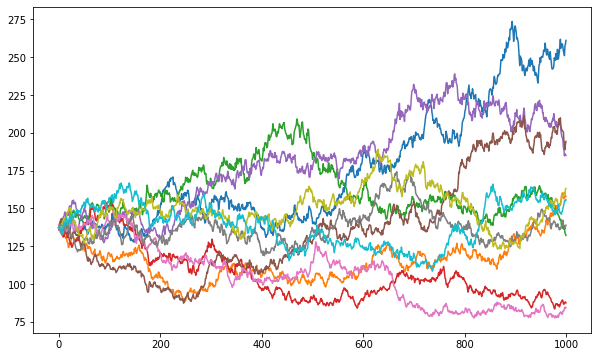

In [43]:
plt.figure(figsize=(10,6))
plt.plot(price_list);